# Oficina 03 de Analise e desempenho
## Aluno: Caio Cid Santiago Barbosa               Matrícula: 378596
### Questão 1
#### Item a

O dataset escolhido foi um dos datasets tradicionais do UCI, o *Poker hand*. Ele é composto de um set de treino, contendo 25010 entradas e um set de teste, contendo 1,000,000 de entradas. Para nossa oficina, iremos utilizar apenas o de treino.
Cada entrada do dataset consiste em descrever 5 cartas de uma mão. Ou seja, são cinco entradas relativas ao naipe (Copas, Espadas, Ouros, Paus) e 5 entradas relativas ao valor (Ás, dois, ... , dez, valete, rainha e rei). Além disso, possuimos uma coluna a mais Poker Hand, que ranqueia a pontuação da mão, onde 0 é o mais baixo e 9 é o mais alto. Todas as entradas são numéricas.

Abaixo temos, respectivamente, uma descrição geral dos dados, as primeiras cinco entradas e as últimas 5 entradas, respectivamente:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st
from sklearn import model_selection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

In [2]:
names = ["N1","V1","N2","V2","N3","V3","N4","V4","N5","V5","Poker Hand"]
df = pd.read_csv("poker-hand-training-true.data", names=names )
print("Descrição")
print(df.describe())
print("\n\nPrimeiras 5 entradas\n")
print(df.head())
print("\n\nÚltimas 5 entradas\n")
print(df.tail())

Descrição
                 N1            V1            N2            V2            N3  \
count  25010.000000  25010.000000  25010.000000  25010.000000  25010.000000   
mean       2.508756      6.995242      2.497721      7.014194      2.510236   
std        1.116483      3.749805      1.121767      3.766974      1.123148   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%        2.000000      4.000000      1.000000      4.000000      2.000000   
50%        3.000000      7.000000      2.000000      7.000000      3.000000   
75%        4.000000     10.000000      4.000000     10.000000      4.000000   
max        4.000000     13.000000      4.000000     13.000000      4.000000   

                 V3            N4            V4            N5            V5  \
count  25010.000000  25010.000000  25010.000000  25010.000000  25010.000000   
mean       7.014154      2.495922      6.942463      2.497321      6.962735   
std        3.744974      1.116009      3.

#### item b

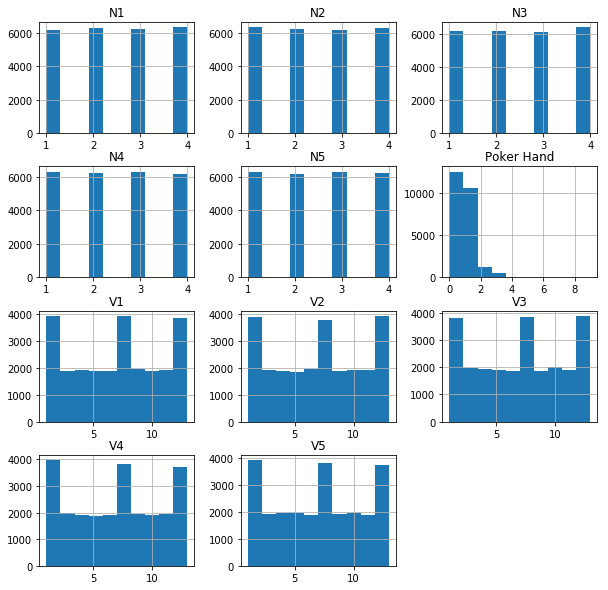

In [3]:
hist=df.hist(figsize=(10,10))

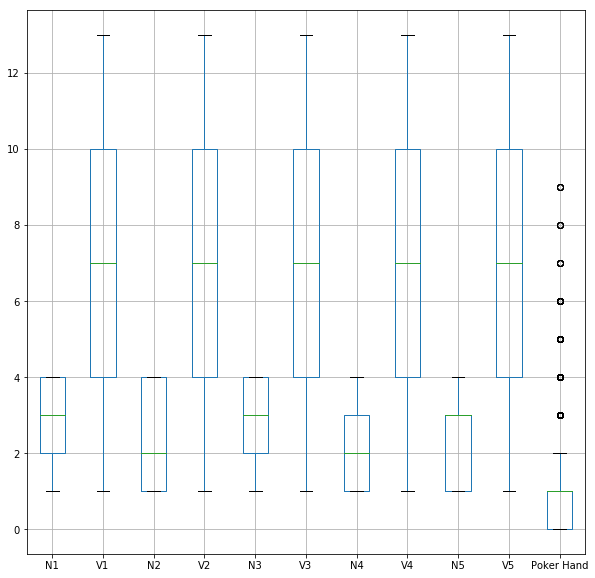

In [4]:
box=df.boxplot(figsize=(10,10))

,N1,V1,N2,V2,N3,V3,N4,V4,N5,V5,Poker Hand
N1,1,-0.01,-0.021,0.0082,-0.02,-0.0099,-0.017,0.0038,-0.024,0.0066,0.0082
V1,-0.01,1,0.0045,-0.011,-0.00038,-0.026,0.0041,-0.014,0.0049,-0.017,0.0023
N2,-0.021,0.0045,1,-0.0024,-0.029,-0.0053,-0.021,0.012,-0.012,0.0058,-0.0011
V2,0.0082,-0.011,-0.0024,1,-0.0054,-0.025,-0.0084,-0.013,0.00064,-0.016,-0.0052
N3,-0.02,-0.00038,-0.029,-0.0054,1,0.018,-0.013,0.0019,-0.03,-0.002,0.004
V3,-0.0099,-0.026,-0.0053,-0.025,0.018,1,-0.0032,-0.016,0.0037,-0.011,-0.0063
N4,-0.017,0.0041,-0.021,-0.0084,-0.013,-0.0032,1,-0.0087,-0.018,0.0053,-0.0016
V4,0.0038,-0.014,0.012,-0.013,0.0019,-0.016,-0.0087,1,0.0028,-0.015,0.01
N5,-0.024,0.0049,-0.012,0.00064,-0.03,0.0037,-0.018,0.0028,1,-0.0032,-0.0056
V5,0.0066,-0.017,0.0058,-0.016,-0.002,-0.011,0.0053,-0.015,-0.0032,1,-0.0024


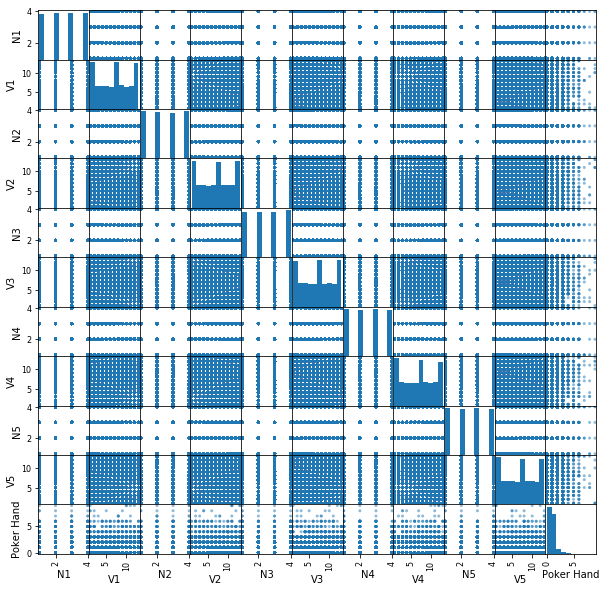

In [5]:
corr = df.corr() #Coeficientes de correlação
pd.plotting.scatter_matrix(df,figsize=(10,10)) #plota todos as matrizes de correlaçao
corr.style.background_gradient(cmap='coolwarm').set_precision(2) #Plota matriz de coeficientes de correlação

#### Item c

Por serem valores categóricos aleatorios e bem distribuidos, não é necessario nenhum pre-processamento dos dados. Ao observar o scatter plot e os valores dos coeficientes de correlação, podemos observar que nao existe nenhum tipo de linearidade sequer entre as variáveis, além delas serem todas numéricas.

#### Item d

No artigo "*Accuracy of Machine Learning Algorithms in Detecting DoS Attacks Types*", o design utilizado foi comparar a acurácia de varios algoritmos de ML com o dataset KDD que fornecia dados de ataques DoS. Além de aplicar o algoritmo, houve um tratamento dos dados para tirar as repetições de dados, que eram muitas, de acordo com o autor. O ponto que poderia ter sido melhorado seria a divisão do conjunto de treino e o de teste, pois ele foi feito apenas uma vez de forma estática. Poderia ter sido testado outros conjuntos de forma dinâmica para ter um maior escopo de dados

No artigo "*An Investigation of Classification Algorithms for Intrusion Detection System - A Quantitative Approach*", o foco foi mais em redução de dimensionalidade. O autor comparou o metodo *Correlation based Feature Selection* (CFC) com o *Principal Component Analysis* (PCA). O mesmo tratamento do dataset KDD do outro artigo foi utilizado nele. Novamente, a divisão dos conjuntos foi estática, então a mesma sugestão anterior cabe aqui.

### Questão 2
#### Item a

Primeiramente, separamos a coluna "target" do resto do dataframe. Posteriormente, iremos definir uma *seed*, que nada mais é que um referencial para as operações randomicas obterem os mesmos resultados independente da máquina onde é executado.

In [6]:
array = df.values
X = array[:,0:9]
Y = array[:,10]

Agora, separaremos o nosso dataset de forma aleatória em set de treino e set de teste na proporção 80/20.

Depois, aplicaremos esse set de treino em um modelo LDA (*Linear Discriminant Analysis*) e compararemos com a saída do set de teste para obtermos a acurácia do nosso modelo.

Por fim, repetiremos isso 100 vezes para obter uma media, mediana e desvio padrão das acurácias do nosso modelo.

In [7]:
seed = 50
scores = []
for i in range(100):
    X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.20, random_state=seed+i)
    lda = LinearDiscriminantAnalysis()
    model = lda.fit(X_train,Y_train)
    scores.append(model.score(X_test,Y_test))
    
print ("\nMédia da acurácia: ",st.mean(scores))
print ("\nMediana da acurácia: ", st.median(scores))
print ("\nDesvio padrão da acurácia: ", st.stdev(scores))


Média da acurácia:  0.49904638144742103

Mediana da acurácia:  0.499000399840064

Desvio padrão da acurácia:  0.005780689985073762


Text(0.5, 0.98, 'Boxplot 80/20')

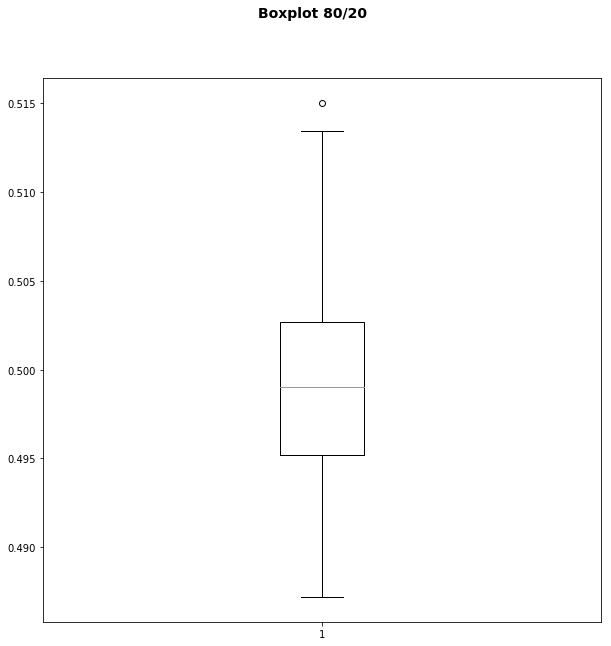

In [8]:
fig = plt.figure(1, figsize=(10, 10))
ax = fig.add_subplot(111)
bp = ax.boxplot(scores)
fig.suptitle('Boxplot 80/20', fontsize=14, fontweight='bold')

#### item b

Serão testado 5 diferentes valores de ressampling do dataset para treino e teste e comparado o quanto isso influência na acurácia


Test set  0.1

Média da acurácia:  0.4990603758496601

Mediana da acurácia:  0.4986005597760896

Desvio padrão da acurácia:  0.011180709110874149

Test set  0.2

Média da acurácia:  0.49904638144742103

Mediana da acurácia:  0.499000399840064

Desvio padrão da acurácia:  0.005780689985073762

Test set  0.30000000000000004

Média da acurácia:  0.4988912579957356

Mediana da acurácia:  0.49913379530916846

Desvio padrão da acurácia:  0.004199235430679013

Test set  0.4

Média da acurácia:  0.49900339864054377

Mediana da acurácia:  0.49920031987205116

Desvio padrão da acurácia:  0.0033272855969844342

Test set  0.5

Média da acurácia:  0.4988940423830468

Mediana da acurácia:  0.49904038384646143

Desvio padrão da acurácia:  0.002873751822127574


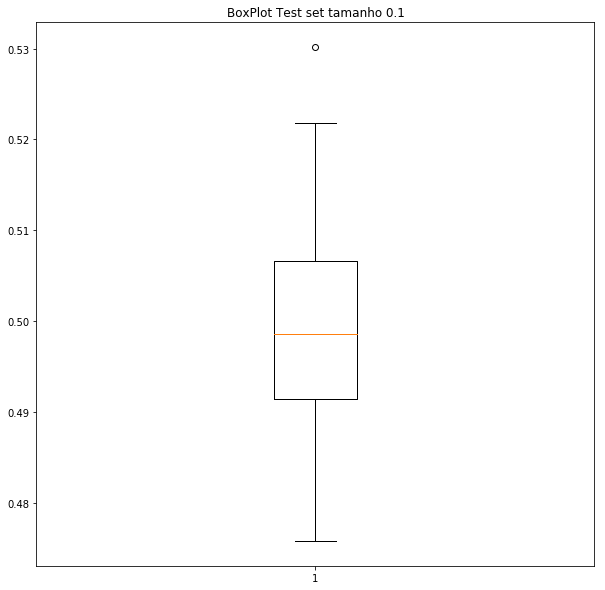

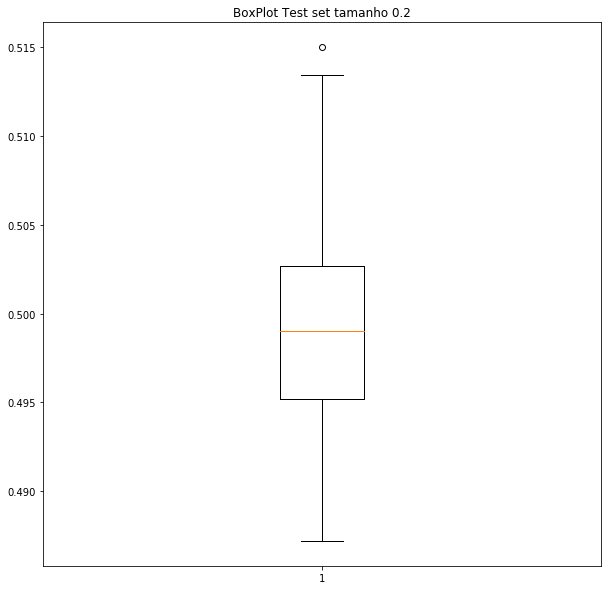

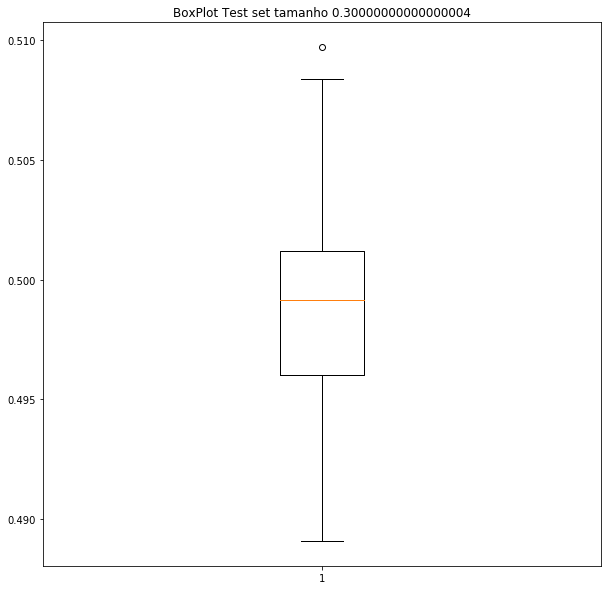

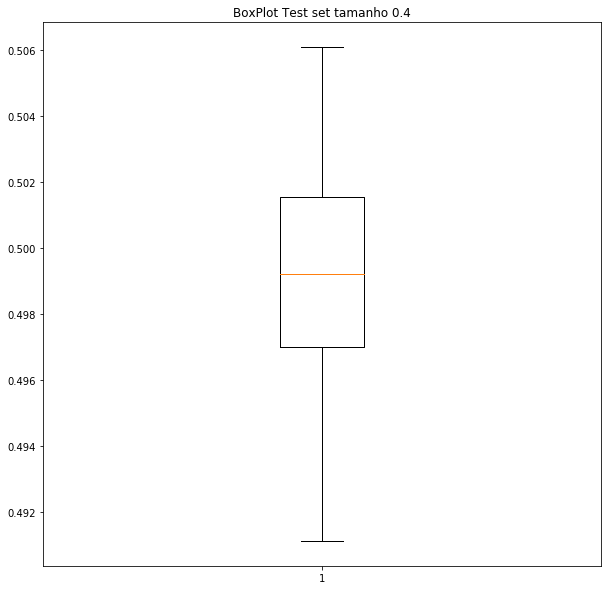

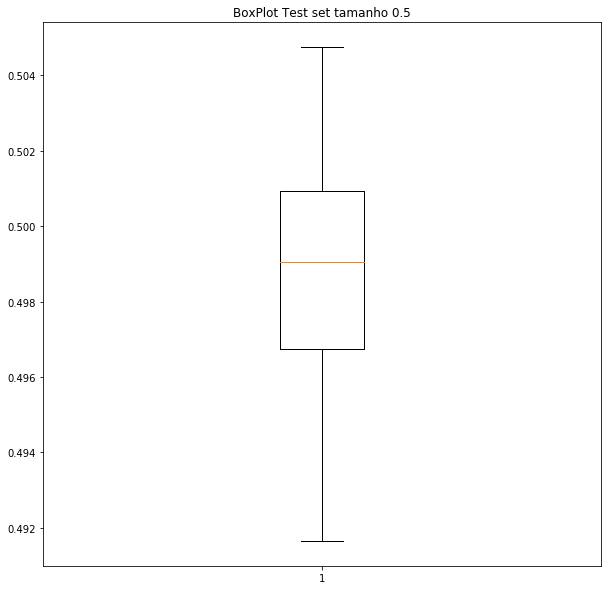

In [9]:
for j in range(5):
    seed = 50
    scores = []
    test_size = 0.1+(0.1*j)
    for i in range(100):
        X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed+i)
        lda = LinearDiscriminantAnalysis()
        model = lda.fit(X_train,Y_train)
        scores.append(model.score(X_test,Y_test))
    print("\nTest set ",test_size)
    print ("\nMédia da acurácia: ",st.mean(scores))
    print ("\nMediana da acurácia: ", st.median(scores))
    print ("\nDesvio padrão da acurácia: ", st.stdev(scores))
    
    fig = plt.figure(j+1, figsize=(10, 10))
    ax = fig.add_subplot(111)
    bp = ax.boxplot(scores)
    ax.set_title("BoxPlot Test set tamanho "+str(test_size))

A conclusão final que chegamos é que alterar a proporção dos nossos datasets de treino e teste não influenciaram no resultado de acurácia do modelo LDA.

#### Item c


Test set  0.1

Média da acurácia:  0.4927548980407837

Mediana da acurácia:  0.4974010395841663

Desvio padrão da acurácia:  0.02324683537574367

Test set  0.2

Média da acurácia:  0.4858076769292283

Mediana da acurácia:  0.4971011595361855

Desvio padrão da acurácia:  0.028172693623621414

Test set  0.30000000000000004

Média da acurácia:  0.4799213752665245

Mediana da acurácia:  0.49460287846481876

Desvio padrão da acurácia:  0.029858755922881623

Test set  0.4

Média da acurácia:  0.47876749300279886

Mediana da acurácia:  0.4926029588164734

Desvio padrão da acurácia:  0.027685324990510858

Test set  0.5

Média da acurácia:  0.4786813274690124

Mediana da acurácia:  0.4868052778888445

Desvio padrão da acurácia:  0.02568021973026089


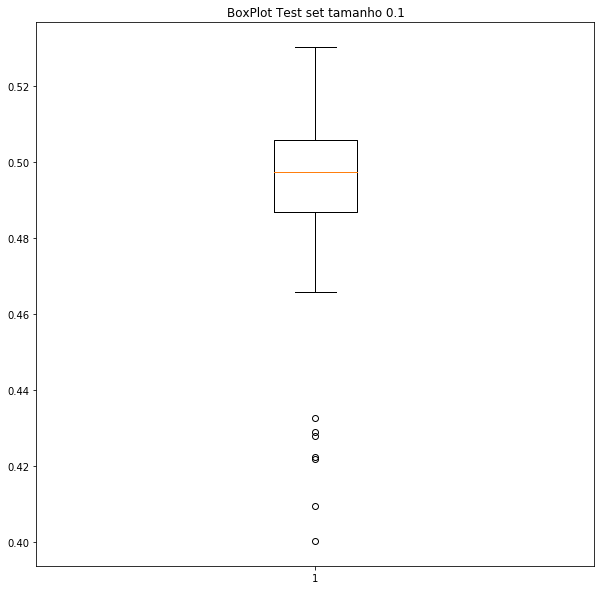

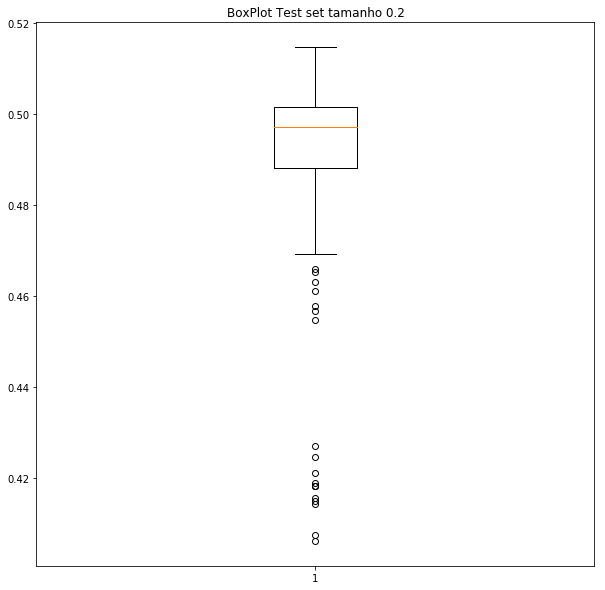

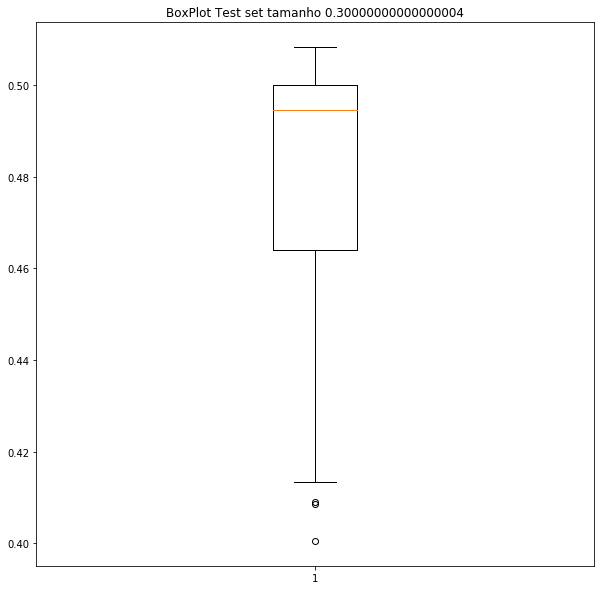

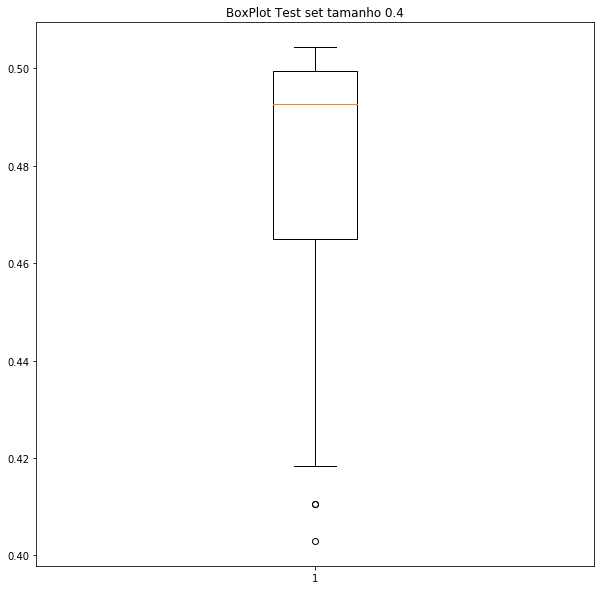

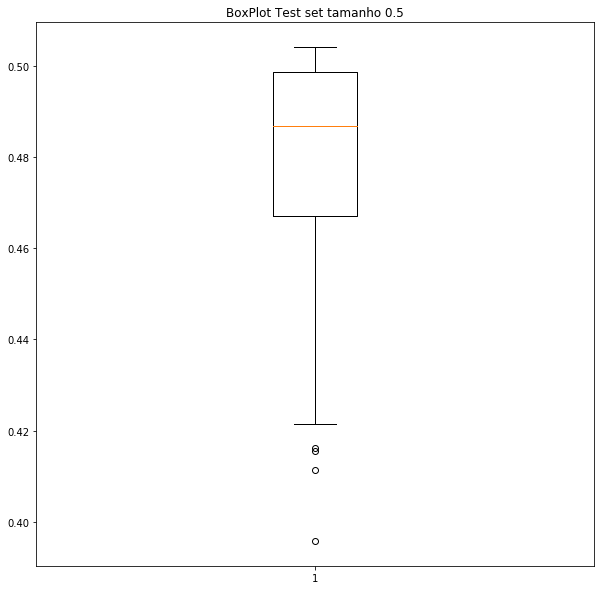

In [10]:
for j in range(5):
    seed = 50
    scores = []
    test_size = 0.1+(0.1*j)
    for i in range(100):
        X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed+i)
        gnb = GaussianNB()
        model = gnb.fit(X_train,Y_train)
        scores.append(model.score(X_test,Y_test))
    print("\nTest set ",test_size)
    print ("\nMédia da acurácia: ",st.mean(scores))
    print ("\nMediana da acurácia: ", st.median(scores))
    print ("\nDesvio padrão da acurácia: ", st.stdev(scores))
    
    fig = plt.figure(j+1, figsize=(10, 10))
    ax = fig.add_subplot(111)
    bp = ax.boxplot(scores)
    ax.set_title("BoxPlot Test set tamanho "+str(test_size))